Tugas Akhir : 

### Analisis Sentimen Mitra untuk Telkom University Pada Media Sosial Twitter Menggunakan Algoritma Decision Tree (CART)

Sean Akbar Ryanto (1301180258)

# Library Package

## Install Library

In [1]:
# Library package untuk preprocessing stopwords removal dan stemming
!pip install PySastrawi
!pip install -U nltk
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import Library

In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import re
nltk.download('punkt')
nltk.download('stopwords')

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import matplotlib.pyplot as plt
import seaborn as sns 

from wordcloud import WordCloud, ImageColorGenerator

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Sentimen

## Read Data

In [3]:
data = pd.read_csv('Dataset Internal Labelled.csv')
data

,Username,Text Tweet,Sentiment
0,telucareer,bersama kak Tasha Maric Tan. Pada sharing kal...,1
1,telucareer,"bekerja diperusahaan tersebut, yaitu kak Okta ...",0
2,telucareer,CTI Group adalah Perusahaan IT yang mendistrib...,0
3,telucareer,[Alumni Sharing Chapter Industry &amp; Campus ...,1
4,telucareer,"CAE di tahun 2021, kamu tetap diperbolehkan me...",1
...,...,...,...
1847,infounivtelkom,Telkom University Badminton Club dengan Bangga...,0
1848,infounivtelkom,🛸[MAIN EVENT IFEST 2019]🛸 . Akhirnya yang ditu...,0
1849,infounivtelkom,"#InfoEvent [MAIN EVENT COMPFEST] Halo, Ignit...",0
1850,infounivtelkom,#InfoEvent [MANIFESTASI 2019 : R E T R O S P ...,0


In [4]:
data['Sentiment'].replace(to_replace = -1, value = 'negatif', inplace=True)
data['Sentiment'].replace(to_replace = 0, value = 'netral', inplace=True)
data['Sentiment'].replace(to_replace = 1, value = 'positif', inplace=True)

data

,Username,Text Tweet,Sentiment
0,telucareer,bersama kak Tasha Maric Tan. Pada sharing kal...,positif
1,telucareer,"bekerja diperusahaan tersebut, yaitu kak Okta ...",netral
2,telucareer,CTI Group adalah Perusahaan IT yang mendistrib...,netral
3,telucareer,[Alumni Sharing Chapter Industry &amp; Campus ...,positif
4,telucareer,"CAE di tahun 2021, kamu tetap diperbolehkan me...",positif
...,...,...,...
1847,infounivtelkom,Telkom University Badminton Club dengan Bangga...,netral
1848,infounivtelkom,🛸[MAIN EVENT IFEST 2019]🛸 . Akhirnya yang ditu...,netral
1849,infounivtelkom,"#InfoEvent [MAIN EVENT COMPFEST] Halo, Ignit...",netral
1850,infounivtelkom,#InfoEvent [MANIFESTASI 2019 : R E T R O S P ...,netral


Text(0.5, 0, 'Sentimen')

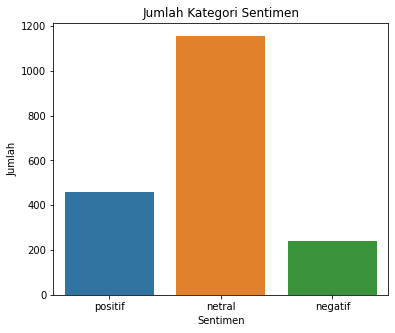

In [5]:
# Menampilkan jumlah kategori sentimen yang dimiliki pada data
f , ax = plt.subplots(figsize = (6,5))
sns.countplot(x='Sentiment', data=data)
plt.title('Jumlah Kategori Sentimen', y=1, size=12)
plt.ylabel('Jumlah')
plt.xlabel('Sentimen')

In [6]:
data['Sentiment'].value_counts()

netral     1156
positif     457
negatif     239
Name: Sentiment, dtype: int64

In [7]:
# Menyalin data yang dimiliki kedalam variabel lain
sentimen1 = data.copy()

## Translate Data

In [8]:
# from googletrans import Translator

# translator = Translator()

In [9]:
# sentimen1['Text Tweet'] = sentimen1['Text Tweet'].apply(translator.translate, src='en', dest='id')

In [10]:
# sentimen1['Text Tweet'] = sentimen1['Text Tweet'].apply(getattr, args=('text',))

# sentimen1

# Pre-Processing

## Data Cleaning

In [11]:
# Fungsi untuk menghapus kata atau karakter unik
def remove_special(x):
    # remove tab, new line, ans back slice
    x = x.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    x = x.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    # x = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)", " ",x).split())
    # remove number
    x = re.sub(r"\d+", "", x)
    # remove punctuation
    x = "".join([i for i in x if i not in string.punctuation])
    # remove single char
    #x = re.sub(r"\b[a-zA-Z]\b", "", x)
    # remove incomplete URL
    # x = x.replace("http://", " ").replace("https://", " ")
    # remove whitespace
    x = x.strip()
    return x

# Menghapus kata/karakter unik pada data yang dimiliki
sentimen1['Text Tweet'] = sentimen1['Text Tweet'].apply(lambda x:remove_special(x))

sentimen1

,Username,Text Tweet,Sentiment
0,telucareer,bersama kak Tasha Maric Tan Pada sharing kali...,positif
1,telucareer,bekerja diperusahaan tersebut yaitu kak Okta P...,netral
2,telucareer,CTI Group adalah Perusahaan IT yang mendistrib...,netral
3,telucareer,Alumni Sharing Chapter Industry amp Campus Hir...,positif
4,telucareer,CAE di tahun kamu tetap diperbolehkan mendaft...,positif
...,...,...,...
1847,infounivtelkom,Telkom University Badminton Club dengan Bangga...,netral
1848,infounivtelkom,MAIN EVENT IFEST Akhirnya yang ditunggutungg...,netral
1849,infounivtelkom,InfoEvent MAIN EVENT COMPFEST Halo Igniters ...,netral
1850,infounivtelkom,InfoEvent MANIFESTASI R E T R O S P E C T I...,netral


## Case Folding

In [12]:
# Mengubah seluruh teks menjadi huruf kecil
sentimen1['Text Tweet'] = sentimen1['Text Tweet'].str.lower()

sentimen1

,Username,Text Tweet,Sentiment
0,telucareer,bersama kak tasha maric tan pada sharing kali...,positif
1,telucareer,bekerja diperusahaan tersebut yaitu kak okta p...,netral
2,telucareer,cti group adalah perusahaan it yang mendistrib...,netral
3,telucareer,alumni sharing chapter industry amp campus hir...,positif
4,telucareer,cae di tahun kamu tetap diperbolehkan mendaft...,positif
...,...,...,...
1847,infounivtelkom,telkom university badminton club dengan bangga...,netral
1848,infounivtelkom,main event ifest akhirnya yang ditunggutungg...,netral
1849,infounivtelkom,infoevent main event compfest halo igniters ...,netral
1850,infounivtelkom,infoevent manifestasi r e t r o s p e c t i...,netral


## Remove Emoji

In [13]:
# def deEmojify(text):
#     regrex_pattern = re.compile(pattern = "["
#         u"\U0001F600-\U0001F64F"  # emoticons
#         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#         u"\U0001F680-\U0001F6FF"  # transport & map symbols
#         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                            "]+", flags = re.UNICODE)
#     return regrex_pattern.sub(r'',text)

# sentimen1['Text Tweet'] = sentimen1['Text Tweet'].apply(deEmojify)

# sentimen1

## Tokenization

In [14]:
# Fungsi untuk memecah kalimat pada dataframe menjadi per kata tiap barisnya
def word_tokenized(x):
  return word_tokenize(x)

# Menginisialisasikan fungsi tokenisasi yang telah dibuat ke data
sentimen1['Text Tweet']= sentimen1['Text Tweet'].apply(word_tokenized)

sentimen1

,Username,Text Tweet,Sentiment
0,telucareer,"[bersama, kak, tasha, maric, tan, pada, sharin...",positif
1,telucareer,"[bekerja, diperusahaan, tersebut, yaitu, kak, ...",netral
2,telucareer,"[cti, group, adalah, perusahaan, it, yang, men...",netral
3,telucareer,"[alumni, sharing, chapter, industry, amp, camp...",positif
4,telucareer,"[cae, di, tahun, kamu, tetap, diperbolehkan, m...",positif
...,...,...,...
1847,infounivtelkom,"[telkom, university, badminton, club, dengan, ...",netral
1848,infounivtelkom,"[main, event, ifest, akhirnya, yang, ditunggut...",netral
1849,infounivtelkom,"[infoevent, main, event, compfest, halo, ignit...",netral
1850,infounivtelkom,"[infoevent, manifestasi, r, e, t, r, o, s, p, ...",netral


## Normalisasi

In [15]:
# Download data KBBI untuk normalisasi
!wget 'https://drive.google.com/uc?export=download&id=1pdvzHGWmnRci3FSWnzF30xMLhG1R8GnG' -O kbba.txt
!wget 'https://drive.google.com/uc?export=download&id=14M_Vi-ySjezLMXgFGThjWxerSixowes_' -O kbba_extend.txt

--2022-06-30 09:29:13--  https://drive.google.com/uc?export=download&id=1pdvzHGWmnRci3FSWnzF30xMLhG1R8GnG
Resolving drive.google.com (drive.google.com)... 74.125.68.100, 74.125.68.102, 74.125.68.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.68.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-14-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6firme1sbb3u7njll4m9tnj1k55kaea4/1656581325000/00150260977202157621/*/1pdvzHGWmnRci3FSWnzF30xMLhG1R8GnG?e=download&uuid=7d85aad8-5db0-46dd-a697-5f27cec5c61a [following]
--2022-06-30 09:29:13--  https://doc-0s-14-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6firme1sbb3u7njll4m9tnj1k55kaea4/1656581325000/00150260977202157621/*/1pdvzHGWmnRci3FSWnzF30xMLhG1R8GnG?e=download&uuid=7d85aad8-5db0-46dd-a697-5f27cec5c61a
Resolving doc-0s-14-docs.googleusercontent.com (doc-0s-14-docs.googleusercontent.com)... 142.250.4.132, 2404:6800:

In [16]:
normalized_word = pd.read_csv("new_kamusalay.csv", encoding='latin-1')

normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

sentimen1['Text Tweet'] = sentimen1['Text Tweet'].apply(normalized_term)

sentimen1

,Username,Text Tweet,Sentiment
0,telucareer,"[bersama, kak, tasha, maric, tan, pada, sharin...",positif
1,telucareer,"[bekerja, diperusahaan, tersebut, yaitu, kak, ...",netral
2,telucareer,"[cti, grup, adalah, perusahaan, it, yang, mend...",netral
3,telucareer,"[alumni, sharing, chapter, industri, amp, kamp...",positif
4,telucareer,"[cae, di, tahun, kamu, tetap, diperbolehkan, m...",positif
...,...,...,...
1847,infounivtelkom,"[telkom, universitas, badminton, club, dengan,...",netral
1848,infounivtelkom,"[main, acara, ifest, akhirnya, yang, ditunggut...",netral
1849,infounivtelkom,"[infoevent, main, acara, compfest, halo, ignit...",netral
1850,infounivtelkom,"[infoevent, manifestasi, r, e, t, r, o, si, p,...",netral


## Stopwords Removal

In [17]:
# Download daftar stopwords tambahan
!wget 'https://drive.google.com/uc?export=download&id=10N-yYkDUReG53SXJrghX1kcJs2_fiB3P' -O stop_new2.txt

--2022-06-30 09:29:16--  https://drive.google.com/uc?export=download&id=10N-yYkDUReG53SXJrghX1kcJs2_fiB3P
Resolving drive.google.com (drive.google.com)... 74.125.68.101, 74.125.68.139, 74.125.68.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.68.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-14-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bhe00q0skveflc4s9a8e5gtgtn3hugqv/1656581325000/00150260977202157621/*/10N-yYkDUReG53SXJrghX1kcJs2_fiB3P?e=download&uuid=1ccb7b6e-7924-4379-8ee8-989dd7c18c6c [following]
--2022-06-30 09:29:17--  https://doc-04-14-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bhe00q0skveflc4s9a8e5gtgtn3hugqv/1656581325000/00150260977202157621/*/10N-yYkDUReG53SXJrghX1kcJs2_fiB3P?e=download&uuid=1ccb7b6e-7924-4379-8ee8-989dd7c18c6c
Resolving doc-04-14-docs.googleusercontent.com (doc-04-14-docs.googleusercontent.com)... 142.250.4.132, 2404:6800:

In [18]:
# Menginisialisasikan Sastrawi
factory = StopWordRemoverFactory()
list_stopwords = factory.get_stop_words()
list_stopwords2 = stopwords.words('indonesian')

# Menambahkan data stopwords
list_stopwords.extend(['kak', 'gwa', 'ayo', 'banget', 'indonesia','indihome', 
                       'pas', 'iya', 'ya', 'sih', 'deh', 'loh', 
                       'oiya','nih', 'ok', 'ah','gua','lg',
                       "yg", "dg", "rt", "dgn", "ny", "d", 'klo', 'ucl','kali'
                       'kalo', 'amp', 'biar', 'bikin', 'bilang','mlu','gni' 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 'by'
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't','ca', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah','ke','di','ini','mah'])

txt_stopword = pd.read_csv('stop_new2.txt', names= ["stopwords"], header = None)

list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

list_stopwords = set(list_stopwords)

# Fungsi untuk menghapus kata yang tidak diperlukan
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]
    
def stopwords_removal2(words):
    return [word for word in words if word not in list_stopwords2]

# Menginisialisasikan fungsi stopwords_removal yang telah dibuat ke data yang dimiliki
sentimen1['Text Tweet'] = sentimen1['Text Tweet'].apply(stopwords_removal)
sentimen1['Text Tweet'] = sentimen1['Text Tweet'].apply(stopwords_removal2)

sentimen1

,Username,Text Tweet,Sentiment
0,telucareer,"[tasha, maric, tan, sharing, informasi, lengka...",positif
1,telucareer,"[diperusahaan, okta, puspita, tim, leader, of,...",netral
2,telucareer,"[cti, grup, perusahaan, it, mendistribusikan, ...",netral
3,telucareer,"[alumni, sharing, chapter, industri, kampus, h...",positif
4,telucareer,"[cae, diperbolehkan, mendaftar, mendaftar, dih...",positif
...,...,...,...
1847,infounivtelkom,"[telkom, universitas, badminton, club, bangga,...",netral
1848,infounivtelkom,"[main, acara, ifest, ditunggutunggu, yuk, ajak...",netral
1849,infounivtelkom,"[infoevent, main, acara, compfest, igniters, p...",netral
1850,infounivtelkom,"[infoevent, manifestasi, si, finally, the, wev...",netral


## Stemming

In [19]:
# Menginisialisasikan Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Mengubah seluruh kata pada dataframe menjadi kata dasar
sentimen1['Text Tweet'] = sentimen1['Text Tweet'].apply(lambda x: [stemmer.stem(y) for y in x])

sentimen1

,Username,Text Tweet,Sentiment
0,telucareer,"[tasha, maric, tan, sharing, informasi, lengka...",positif
1,telucareer,"[usaha, okta, puspita, tim, leader, of, techni...",netral
2,telucareer,"[cti, grup, usaha, it, distribusi, merek, tekn...",netral
3,telucareer,"[alumni, sharing, chapter, industri, kampus, h...",positif
4,telucareer,"[cae, boleh, daftar, daftar, hubung, admin, pe...",positif
...,...,...,...
1847,infounivtelkom,"[telkom, universitas, badminton, club, bangga,...",netral
1848,infounivtelkom,"[main, acara, ifest, ditunggutunggu, yuk, ajak...",netral
1849,infounivtelkom,"[infoevent, main, acara, compfest, igniters, p...",netral
1850,infounivtelkom,"[infoevent, manifestasi, si, finally, the, wev...",netral


## Untokenization

In [20]:
#Menggabungkan kembali kata kata yang telah dipecah menjadi 1 kalimat
def untokenize(words):
    text = ' '.join(words)
    step1 = text.replace("`` ", '"').replace(" ''", '"').replace('. . .',  '...')
    step2 = step1.replace(" ( ", " (").replace(" ) ", ") ")
    step3 = re.sub(r' ([.,:;?!%]+)([ \'"`])', r"\1\2", step2)
    step4 = re.sub(r' ([.,:;?!%]+)$', r"\1", step3)
    step5 = step4.replace(" '", "'").replace(" n't", "n't").replace(
         "can not", "cannot")
    step6 = step5.replace(" ` ", " '")
    return step6.strip()

sentimen1['Text Tweet'] = sentimen1['Text Tweet'].apply(untokenize)

sentimen1

,Username,Text Tweet,Sentiment
0,telucareer,tasha maric tan sharing informasi lengkap lowo...,positif
1,telucareer,usaha okta puspita tim leader of technical net...,netral
2,telucareer,cti grup usaha it distribusi merek teknologi i...,netral
3,telucareer,alumni sharing chapter industri kampus hiring ...,positif
4,telucareer,cae boleh daftar daftar hubung admin perihal j...,positif
...,...,...,...
1847,infounivtelkom,telkom universitas badminton club bangga semba...,netral
1848,infounivtelkom,main acara ifest ditunggutunggu yuk ajak teman...,netral
1849,infounivtelkom,infoevent main acara compfest igniters pasti h...,netral
1850,infounivtelkom,infoevent manifestasi si finally the weve been...,netral


# Data Splitting

In [21]:
# Memecah/memisahkan dataset kedalam bentuk data train dan data validasi dengan perbandingan 80:20
x1 = sentimen1['Text Tweet']
y1 = sentimen1['Sentiment']

from sklearn.model_selection import train_test_split

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.20 , shuffle=True, random_state=123)

In [22]:
# Memecah/memisahkan dataset kedalam bentuk data train dan data validasi dengan perbandingan 75:25
x2 = sentimen1['Text Tweet']
y2 = sentimen1['Sentiment']

from sklearn.model_selection import train_test_split

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.25 , shuffle=True, random_state=123)

In [23]:
# Memecah/memisahkan dataset kedalam bentuk data train dan data validasi dengan perbandingan 70:30
x3 = sentimen1['Text Tweet']
y3 = sentimen1['Sentiment']

from sklearn.model_selection import train_test_split

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.30 , shuffle=True, random_state=123)

# Feature Extraction TF-IDF (80:20)

## Proses Pembobotan TF-IDF

In [24]:
# Melakukan pembobotan terhadap data x_train dan y_train yang telah dilakukan splitting
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(2,2))
vector = vectorizer.fit(sentimen1['Text Tweet'])
x1_train_tfidf = vector.transform(x1_train)
x1_test_tfidf = vector.transform(x1_test)

## Hasil Pembobotan TF-IDF

In [25]:
# Tabel Hasil Pembobotan x_train
weights = np.asarray(x1_train_tfidf.mean(axis=0)).ravel().tolist()
weights_x1_train_tfidf = pd.DataFrame({"term": vector.get_feature_names(),"weight": weights})
weights_x1_train_tfidf.sort_values(by= "weight", ascending = False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
15198,telucae telkomuniversity,0.019733
8826,lowong kerja,0.019286
15152,telu career,0.015289
8858,lowongankerja infoloker,0.015035
6598,internship jobfair,0.014629
...,...,...
12471,registration now,0.000000
12473,registration send,0.000000
12474,regstrasi httpstcowamoqrykh,0.000000
12475,regular early,0.000000


In [26]:
# Tabel Hasil Pembobotan x_test
weights = np.asarray(x1_test_tfidf.mean(axis=0)).ravel().tolist()
weights_x1_test_tfidf = pd.DataFrame({"term": vector.get_feature_names(),"weight": weights})
weights_x1_test_tfidf.sort_values(by= "weight", ascending = False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
15198,telucae telkomuniversity,0.018801
8826,lowong kerja,0.016810
15152,telu career,0.016124
8858,lowongankerja infoloker,0.014568
6598,internship jobfair,0.013554
...,...,...
6579,internasional wakil,0.000000
6581,internetmu pada,0.000000
6583,interns last,0.000000
6584,interns requirements,0.000000


# Feature Extraction TF-IDF (75:25)

## Proses Pembobotan TF-IDF

In [27]:
# Melakukan pembobotan terhadap data x_train dan y_train yang telah dilakukan splitting
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(2,2))
vector = vectorizer.fit(sentimen1['Text Tweet'])
x2_train_tfidf = vector.transform(x2_train)
x2_test_tfidf = vector.transform(x2_test)

## Hasil Pembobotan TF-IDF

In [28]:
# Tabel Hasil Pembobotan x_train
weights = np.asarray(x2_train_tfidf.mean(axis=0)).ravel().tolist()
weights_x2_train_tfidf = pd.DataFrame({"term": vector.get_feature_names(),"weight": weights})
weights_x2_train_tfidf.sort_values(by= "weight", ascending = False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
15198,telucae telkomuniversity,0.019734
8826,lowong kerja,0.019040
15152,telu career,0.016012
8858,lowongankerja infoloker,0.014826
6598,internship jobfair,0.014417
...,...,...
14790,technology agit,0.000000
1849,bingung strategi,0.000000
14792,technology are,0.000000
14793,technology bareng,0.000000


In [29]:
# Tabel Hasil Pembobotan x_test
weights = np.asarray(x2_test_tfidf.mean(axis=0)).ravel().tolist()
weights_x2_test_tfidf = pd.DataFrame({"term": vector.get_feature_names(),"weight": weights})
weights_x2_test_tfidf.sort_values(by= "weight", ascending = False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
15198,telucae telkomuniversity,0.018984
8826,lowong kerja,0.018041
8858,lowongankerja infoloker,0.015285
6598,internship jobfair,0.014404
15152,telu career,0.013791
...,...,...
6783,it serveasy,0.000000
6785,it sistem,0.000000
6788,it specialist,0.000000
6789,it staf,0.000000


# Feature Extraction TF-IDF (70:30)

## Proses Pembobotan TF-IDF

In [30]:
# Melakukan pembobotan terhadap data x_train dan y_train yang telah dilakukan splitting
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(2,2))
vector = vectorizer.fit(sentimen1['Text Tweet'])
x3_train_tfidf = vector.transform(x3_train)
x3_test_tfidf = vector.transform(x3_test)

## Hasil Pembobotan TF-IDF

In [31]:
# Tabel Hasil Pembobotan x_train
weights = np.asarray(x3_train_tfidf.mean(axis=0)).ravel().tolist()
weights_x3_train_tfidf = pd.DataFrame({"term": vector.get_feature_names(),"weight": weights})
weights_x3_train_tfidf.sort_values(by= "weight", ascending = False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
15198,telucae telkomuniversity,0.019835
8826,lowong kerja,0.019013
15152,telu career,0.016439
8858,lowongankerja infoloker,0.014819
6598,internship jobfair,0.014385
...,...,...
3729,diupload web,0.000000
3730,divisi analisa,0.000000
11718,program offering,0.000000
11716,program nasional,0.000000


In [32]:
# Tabel Hasil Pembobotan x_test
weights = np.asarray(x3_test_tfidf.mean(axis=0)).ravel().tolist()
weights_x3_test_tfidf = pd.DataFrame({"term": vector.get_feature_names(),"weight": weights})
weights_x3_test_tfidf.sort_values(by= "weight", ascending = False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
15198,telucae telkomuniversity,0.018874
8826,lowong kerja,0.018271
8858,lowongankerja infoloker,0.015225
6598,internship jobfair,0.014478
15152,telu career,0.013167
...,...,...
6979,jastis mobile,0.000000
6981,jatuh your,0.000000
6985,java bootcamp,0.000000
6986,java developer,0.000000


# Klasifikasi

In [33]:
# Library package untuk evaluasi model dengan nilai akurasi
from sklearn.metrics import accuracy_score

# Library package untuk evaluasi keseluruhan performa model
from sklearn.metrics import classification_report

## Hyperparameter Tuning GridSearchCV (80:20)

In [47]:
from sklearn.tree import DecisionTreeClassifier     # Library package untuk klasifikasi algoritma Decision Tree
from sklearn.model_selection import GridSearchCV    # Library package untuk menggunakan validasi GridSearchCV

# Mencari parameter max_depth terbaik antara 1 sampai 30 untuk Decision Tree (CART)
param_grid = {'max_depth' : np.arange(1, 30),
              'splitter' : ['best', 'random']}

# Melatih model untuk mencari parameter max_dept terbaik untuk Decision Tree (CART) berdasarkan nilai akurasi
dt_clf1 = GridSearchCV(DecisionTreeClassifier(criterion='gini'), param_grid, cv=10, scoring='accuracy')
dt_clf1.fit(x1_train_tfidf, y1_train)

# Menampilkan parameter max_depth terbaik
print('best parameter : ', dt_clf1.best_params_)

best parameter :  {'max_depth': 26, 'splitter': 'random'}


In [48]:
# Menampilkan akurasi terbaik
print('accuracy : ', dt_clf1.best_score_)

accuracy :  0.7116724106656993


### Decision Tree 80:20

In [49]:
# Melatih model klasifikasi dengan algoritma Decision Tree (CART)
dt_clf1 = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=29)
dt_clf1.fit(x1_train_tfidf, y1_train)

# Memprediksi label sentimen dengan data validasi
dt_predict1 = dt_clf1.predict(x1_test_tfidf)

# Menampilkan akurasi dari algoritma Decision Tree (CART) yang didapatkan
print("Decision Tree Accuracy Score:", round(accuracy_score(dt_predict1, y1_test) * 100, 4), '%')

# Menampilkan hasil evaluasi performa secara keseluruhan
print("Classification Report:")
print(classification_report(dt_predict1, y1_test, digits=4))

Decision Tree Accuracy Score: 67.1159 %
Classification Report:
              precision    recall  f1-score   support

     negatif     0.5918    0.7838    0.6744        37
      netral     0.9211    0.6709    0.7763       313
     positif     0.1064    0.4762    0.1739        21

    accuracy                         0.6712       371
   macro avg     0.5398    0.6436    0.5416       371
weighted avg     0.8421    0.6712    0.7321       371



## Confusion Matrix 80:20

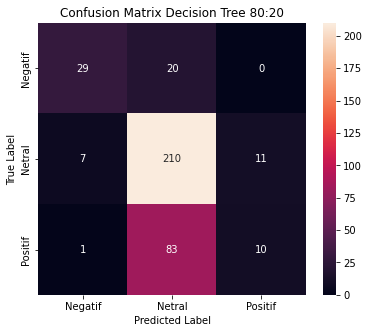

In [50]:
from sklearn.metrics import confusion_matrix

f , ax = plt.subplots(figsize = (6,5))
conf_mat = confusion_matrix(y1_test, dt_predict1)
class_label = ["Negatif", "Netral", "Positif"]
cm = pd.DataFrame(conf_mat, index=class_label, columns=class_label)
sns.heatmap(cm, annot = True,  fmt=".0f", ax=ax)
plt.title("Confusion Matrix Decision Tree 80:20", y=1, size=12)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Hyperparameter Tuning GridSearchCV (75:25)

In [51]:
from sklearn.tree import DecisionTreeClassifier     # Library package untuk klasifikasi algoritma Decision Tree
from sklearn.model_selection import GridSearchCV

# Mencari parameter max_depth terbaik antara 1 sampai 30 untuk Decision Tree (CART)
param_grid = {'max_depth' : np.arange(1, 30),
              'splitter' : ['best', 'random']}

# Melatih model untuk mencari parameter max_dept terbaik untuk Decision Tree (CART) berdasarkan nilai akurasi
dt_clf2 = GridSearchCV(DecisionTreeClassifier(criterion='gini'), param_grid, cv=10, scoring='accuracy')
dt_clf2.fit(x2_train_tfidf, y2_train)

# Menampilkan parameter max_depth terbaik
print('best parameter : ', dt_clf2.best_params_)

best parameter :  {'max_depth': 21, 'splitter': 'random'}


In [52]:
# Menampilkan akurasi terbaik
print('accuracy : ', dt_clf2.best_score_)

accuracy :  0.7163382337608175


### Decision Tree 75:25

In [53]:
# Melatih model klasifikasi dengan algoritma Decision Tree (CART)
dt_clf2 = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=21)
dt_clf2.fit(x2_train_tfidf, y2_train)

# Memprediksi label sentimen dengan data validasi
dt_predict2 = dt_clf2.predict(x2_test_tfidf)

# Menampilkan akurasi dari algoritma Decision Tree (CART) yang didapatkan
print("Decision Tree Accuracy Score:", round(accuracy_score(dt_predict2, y2_test) * 100, 4), '%')

# Menampilkan hasil evaluasi performa secara keseluruhan
print("Classification Report:")
print(classification_report(dt_predict2, y2_test, digits=4))

Decision Tree Accuracy Score: 68.8985 %
Classification Report:
              precision    recall  f1-score   support

     negatif     0.6441    0.8261    0.7238        46
      netral     0.9371    0.6837    0.7906       392
     positif     0.1102    0.5200    0.1818        25

    accuracy                         0.6890       463
   macro avg     0.5638    0.6766    0.5654       463
weighted avg     0.8633    0.6890    0.7511       463



## Confusion Matrix Decision Tree 75:25

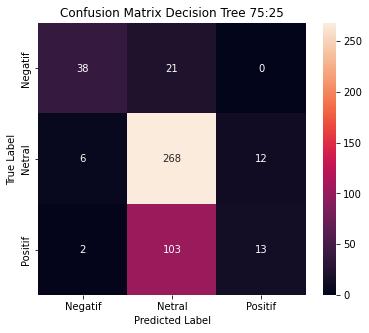

In [54]:
from sklearn.metrics import confusion_matrix

f , ax = plt.subplots(figsize = (6,5))
conf_mat = confusion_matrix(y2_test, dt_predict2)
class_label = ["Negatif", "Netral", "Positif"]
cm = pd.DataFrame(conf_mat, index=class_label, columns=class_label)
sns.heatmap(cm, annot = True,  fmt=".0f", ax=ax)
plt.title("Confusion Matrix Decision Tree 75:25", y=1, size=12)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Hyperparameter Tuning GridSearchCV (70:30)

In [55]:
from sklearn.tree import DecisionTreeClassifier     # Library package untuk klasifikasi algoritma Decision Tree
from sklearn.model_selection import GridSearchCV

# Mencari parameter max_depth terbaik antara 1 sampai 30 untuk Decision Tree (CART)
param_grid = {'max_depth' : np.arange(1, 30),
              'splitter' : ['best', 'random']}

# Melatih model untuk mencari parameter max_dept terbaik untuk Decision Tree (CART) berdasarkan nilai akurasi
dt_clf3 = GridSearchCV(DecisionTreeClassifier(criterion='gini'), param_grid, cv=10, scoring='accuracy')
dt_clf3.fit(x3_train_tfidf, y3_train)

# Menampilkan parameter max_depth terbaik
print('best parameter : ', dt_clf3.best_params_)

best parameter :  {'max_depth': 26, 'splitter': 'random'}


In [56]:
# Menampilkan akurasi terbaik
print('accuracy : ', dt_clf3.best_score_)

accuracy :  0.7075432319618367


### Decision Tree 70:30

In [57]:
# Melatih model klasifikasi dengan algoritma Decision Tree (CART)
dt_clf3 = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=26)
dt_clf3.fit(x3_train_tfidf, y3_train)

# Memprediksi label sentimen dengan data validasi
dt_predict3 = dt_clf3.predict(x3_test_tfidf)

# Menampilkan akurasi dari algoritma Decision Tree (CART) yang didapatkan
print("Decision Tree Accuracy Score:", round(accuracy_score(dt_predict3, y3_test) * 100, 4), '%')

# Menampilkan hasil evaluasi performa secara keseluruhan
print("Classification Report:")
print(classification_report(dt_predict3, y3_test, digits=4))

Decision Tree Accuracy Score: 67.446 %
Classification Report:
              precision    recall  f1-score   support

     negatif     0.6711    0.8226    0.7391        62
      netral     0.9260    0.6702    0.7776       467
     positif     0.0775    0.4074    0.1302        27

    accuracy                         0.6745       556
   macro avg     0.5582    0.6334    0.5490       556
weighted avg     0.8564    0.6745    0.7419       556



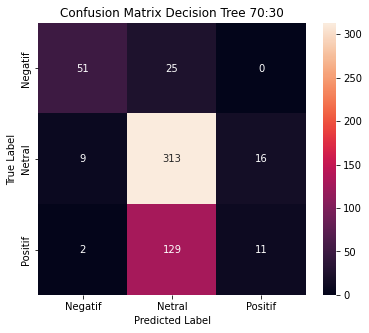

In [58]:
from sklearn.metrics import confusion_matrix

f , ax = plt.subplots(figsize = (6,5))
conf_mat = confusion_matrix(y3_test, dt_predict3)
class_label = ["Negatif", "Netral", "Positif"]
cm = pd.DataFrame(conf_mat, index=class_label, columns=class_label)
sns.heatmap(cm, annot = True,  fmt=".0f", ax=ax)
plt.title("Confusion Matrix Decision Tree 70:30", y=1, size=12)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()